In [7]:
import pickle
from pyteomics import pylab_aux as pa, usi
import matplotlib.pyplot as plt
from matchms import Scores, Spectrum
from matchms.similarity import CosineGreedy
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# train_theospecs = pickle.load(open('../data/train/theospec.pkl', 'rb'))
test_theospecs = pickle.load(open('../data/test/theospec.pkl', 'rb'))

In [9]:
# train_spectrums = pickle.load(open('../data/train/spectrum.pkl', 'rb'))
test_spectrums = pickle.load(open('../data/test/spectrum.pkl', 'rb'))

In [10]:
mzml_file = '01075_G01_P010693_S00_N07_R1.mzML'
spectrums_to_plot = [(17338, 'R.AIGGGLSSVGGGSSTIKYTTTSSSSR.K'),
 (8220, 'R.VHGPGIQSGTTNKPNKFTVETR.G'),
 (20555, 'K.TVLTGTKDTVC+57.021SGVTGAVNVAK.G'),
 (8223, 'R.VHGPGIQSGTTNKPNKFTVETR.G'),
 (8057, 'R.VHGPGIQSGTTNKPNKFTVETR.G')]

In [11]:
# Gives filtered arrays based on ion_info
def select_ion_data(mz_arr, intensity_arr, ion_info, select_ions):
    filtered_mz_arr=[]
    filtered_intensity_arr=[]
    for x, y, z in zip(mz_arr, intensity_arr, ion_info):
        if z[0] in select_ions:
            filtered_mz_arr.append(x)
            filtered_intensity_arr.append(y)

    return filtered_mz_arr, filtered_intensity_arr

[['a'], ['b'], ['c'], ['x'], ['y'], ['z'], ['a', 'b'], ['a', 'c'], ['a', 'x'], ['a', 'y'], ['a', 'z'], ['b', 'c'], ['b', 'x'], ['b', 'y'], ['b', 'z'], ['c', 'x'], ['c', 'y'], ['c', 'z'], ['x', 'y'], ['x', 'z'], ['y', 'z'], ['a', 'b', 'c'], ['a', 'b', 'x'], ['a', 'b', 'y'], ['a', 'b', 'z'], ['a', 'c', 'x'], ['a', 'c', 'y'], ['a', 'c', 'z'], ['a', 'x', 'y'], ['a', 'x', 'z'], ['a', 'y', 'z'], ['b', 'c', 'x'], ['b', 'c', 'y'], ['b', 'c', 'z'], ['b', 'x', 'y'], ['b', 'x', 'z'], ['b', 'y', 'z'], ['c', 'x', 'y'], ['c', 'x', 'z'], ['c', 'y', 'z'], ['x', 'y', 'z'], ['a', 'b', 'c', 'x'], ['a', 'b', 'c', 'y'], ['a', 'b', 'c', 'z'], ['a', 'b', 'x', 'y'], ['a', 'b', 'x', 'z'], ['a', 'b', 'y', 'z'], ['a', 'c', 'x', 'y'], ['a', 'c', 'x', 'z'], ['a', 'c', 'y', 'z'], ['a', 'x', 'y', 'z'], ['b', 'c', 'x', 'y'], ['b', 'c', 'x', 'z'], ['b', 'c', 'y', 'z'], ['b', 'x', 'y', 'z'], ['c', 'x', 'y', 'z'], ['a', 'b', 'c', 'x', 'y'], ['a', 'b', 'c', 'x', 'z'], ['a', 'b', 'c', 'y', 'z'], ['a', 'b', 'x', 'y', 'z'],

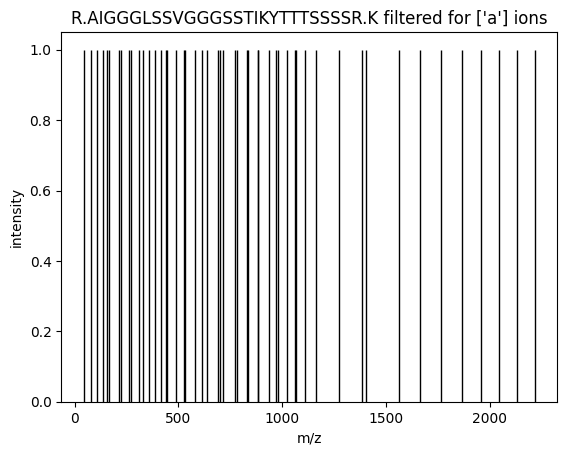

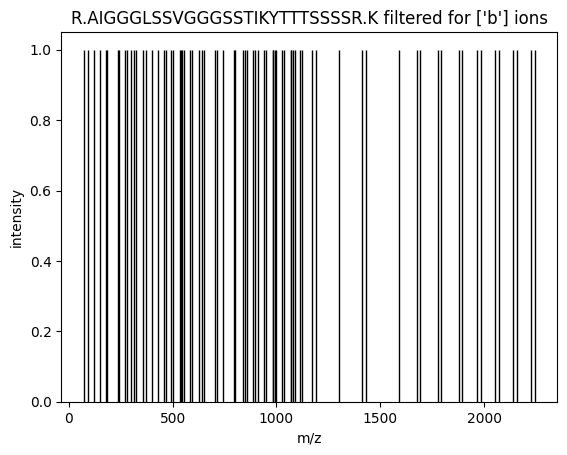

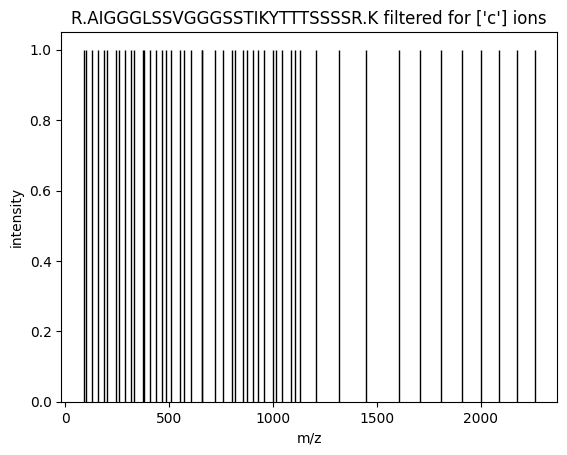

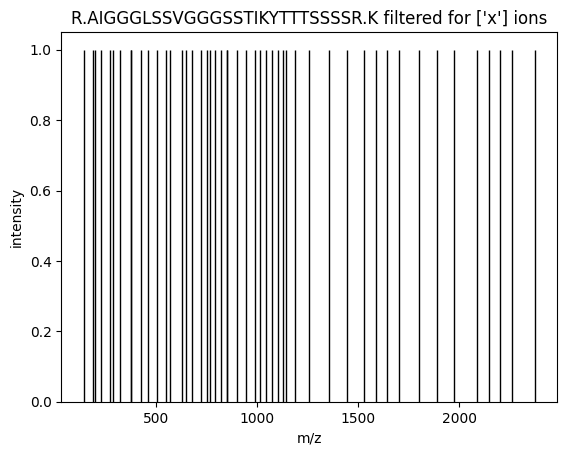

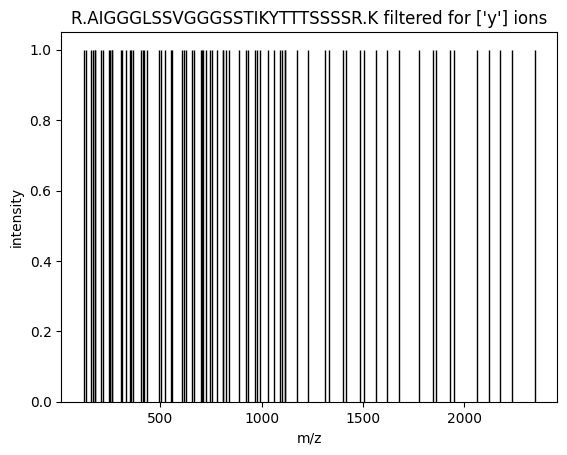

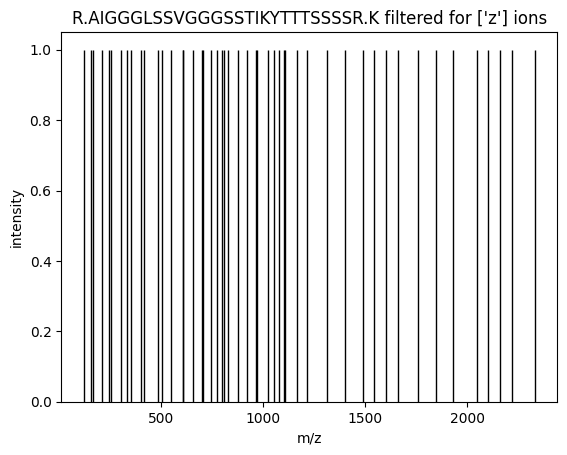

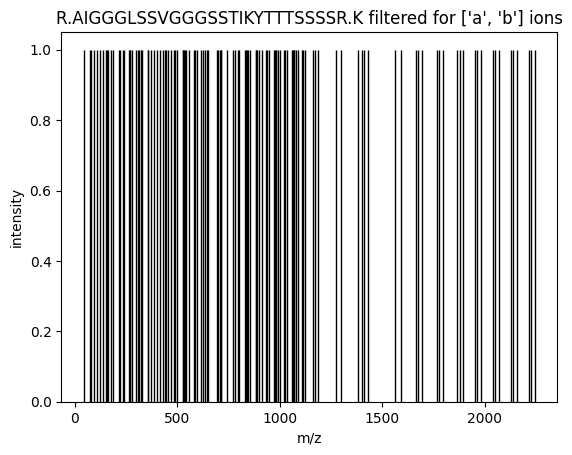

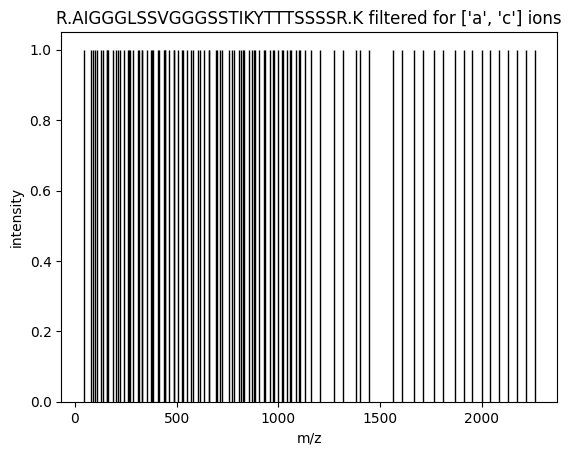

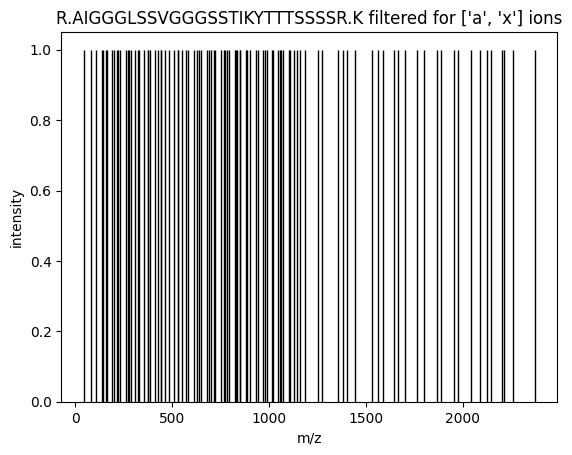

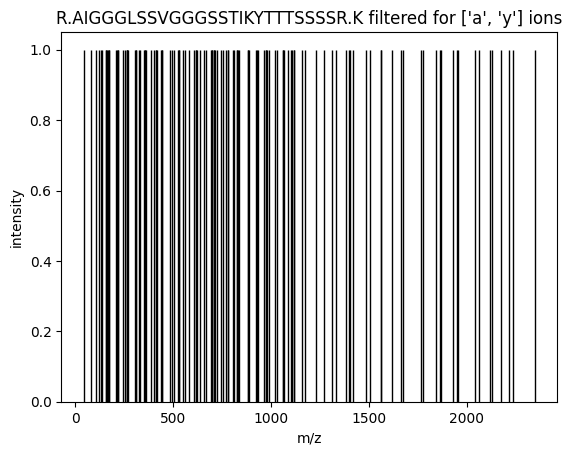

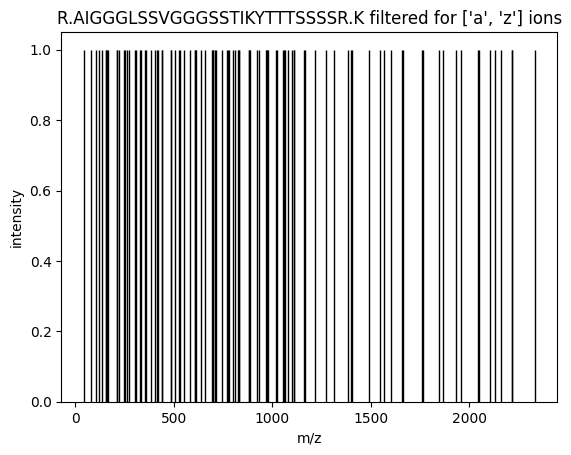

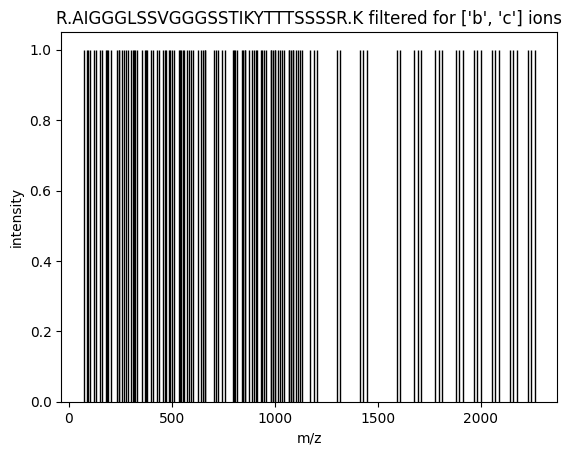

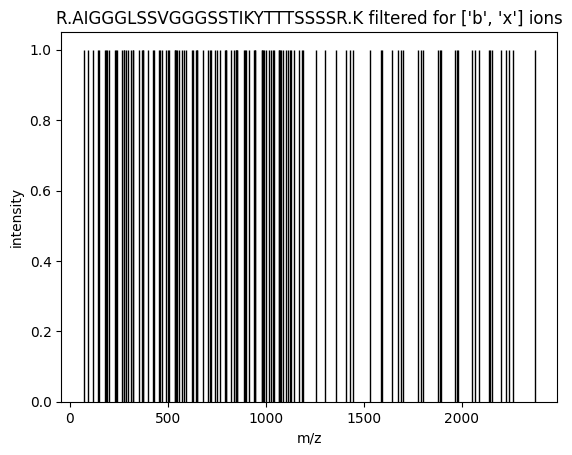

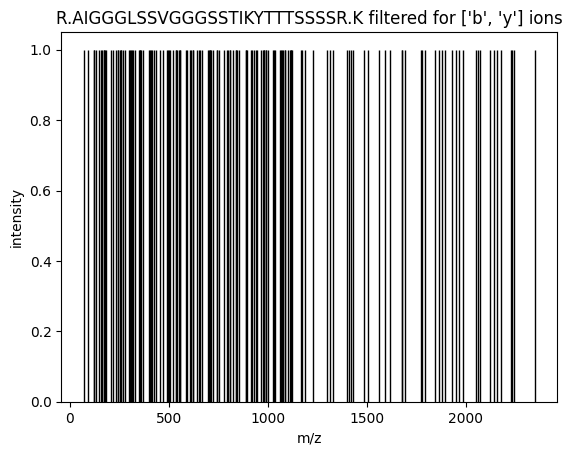

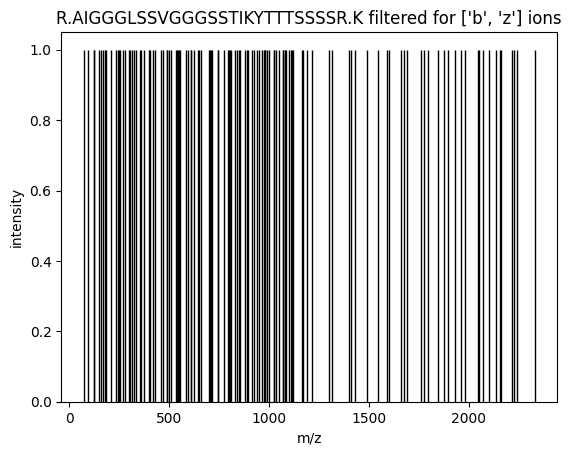

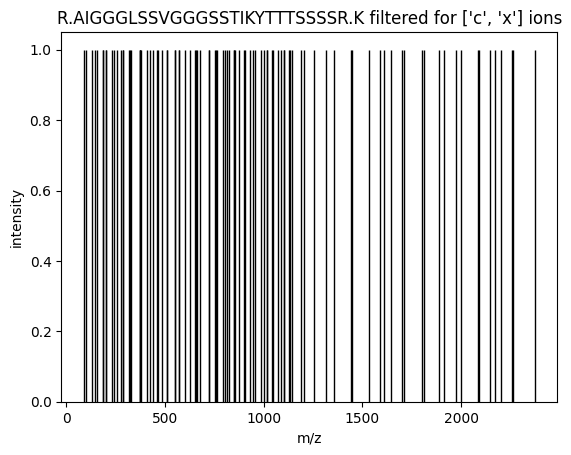

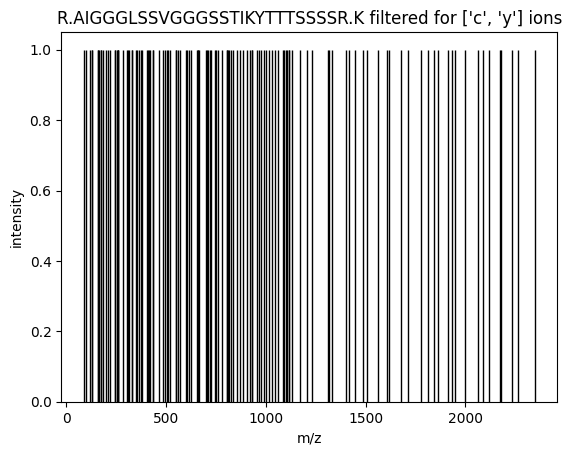

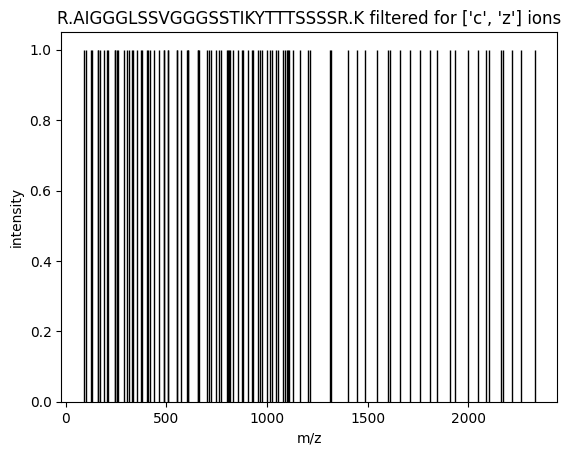

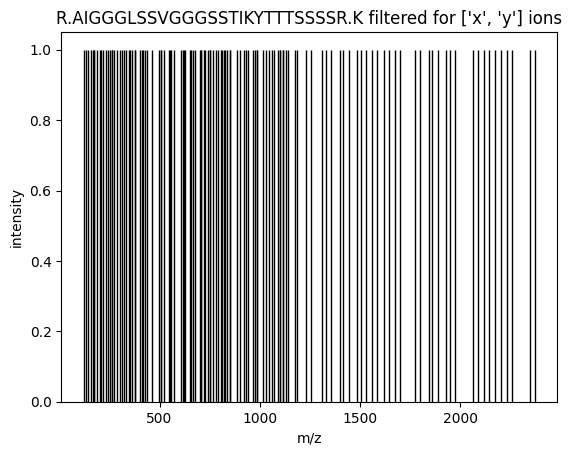

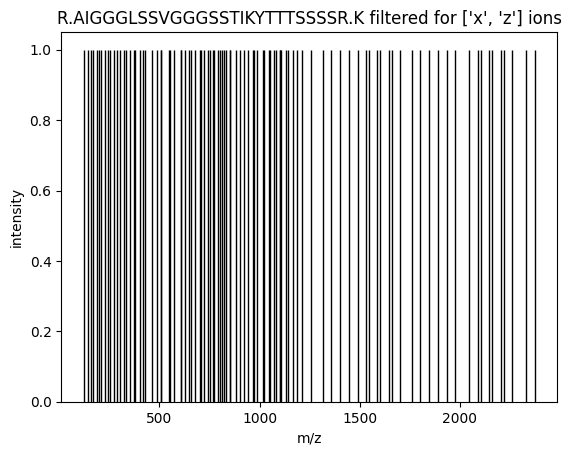

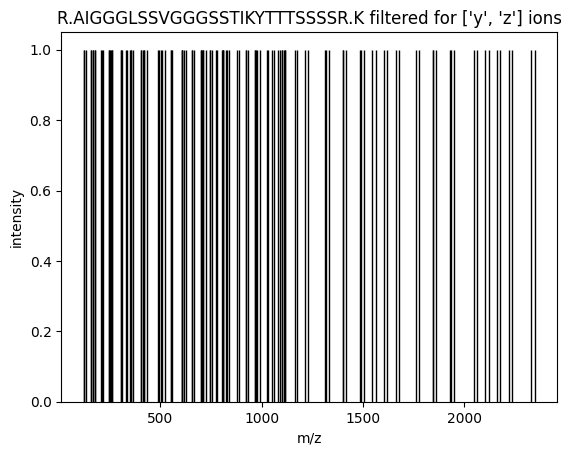

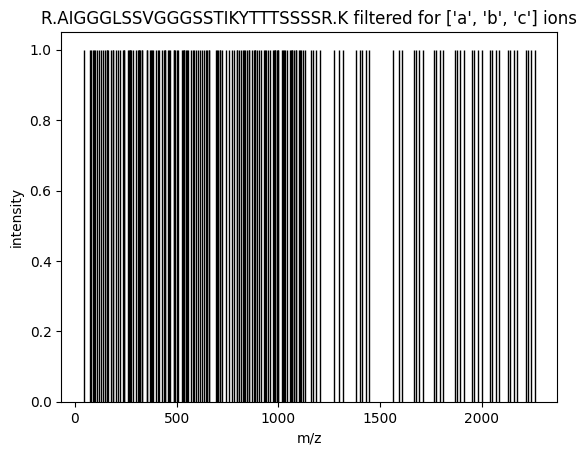

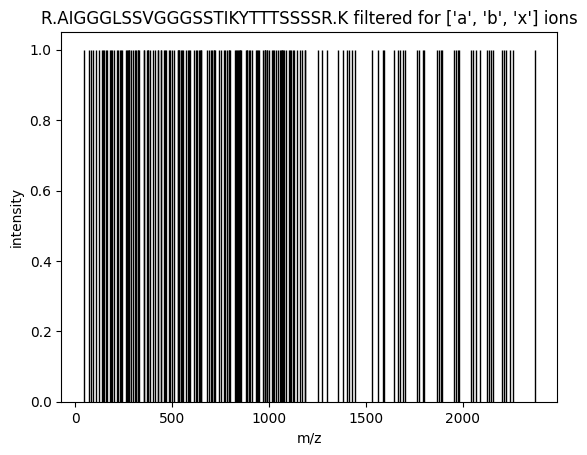

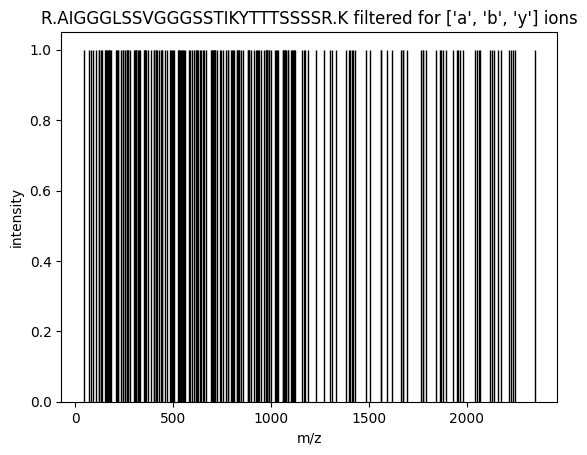

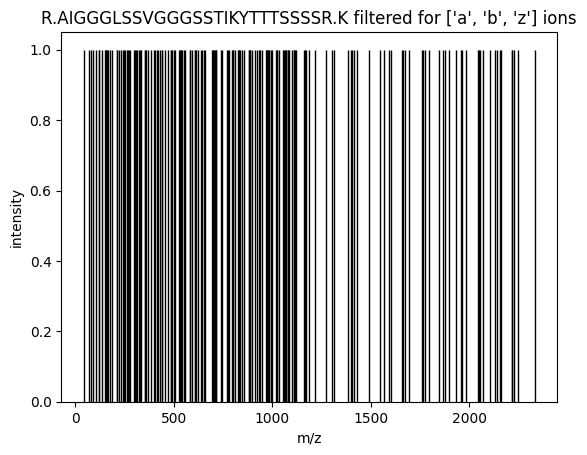

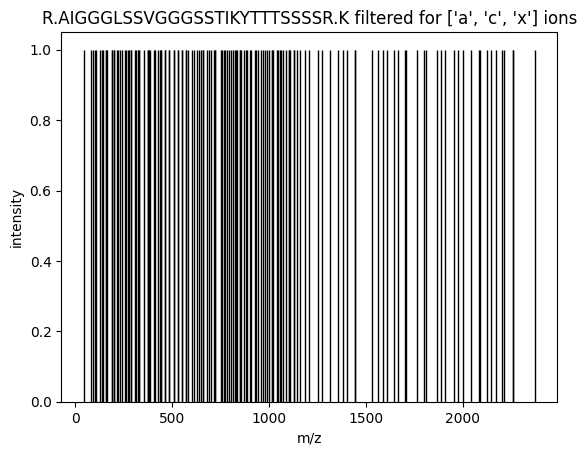

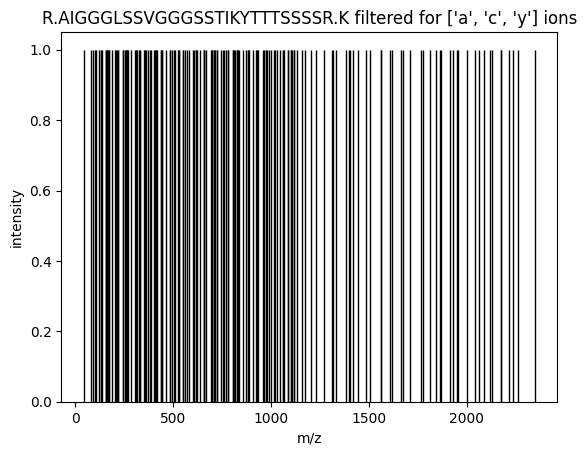

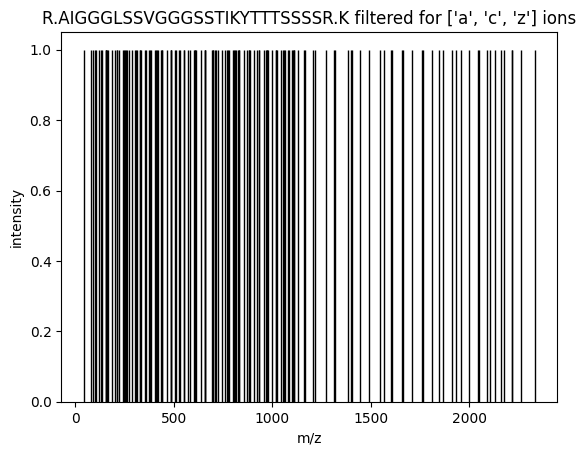

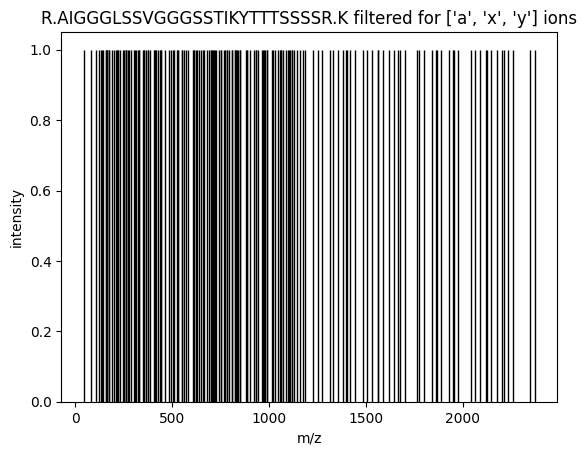

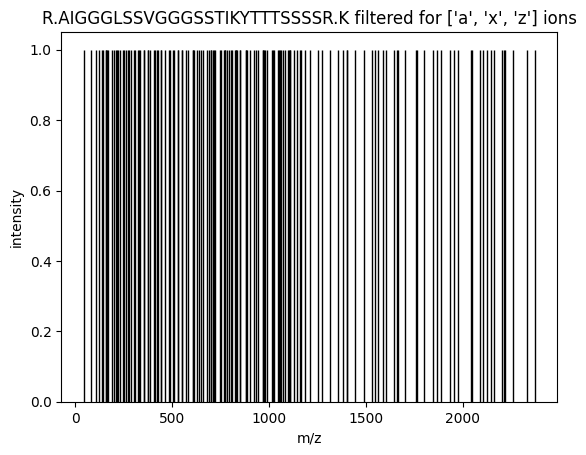

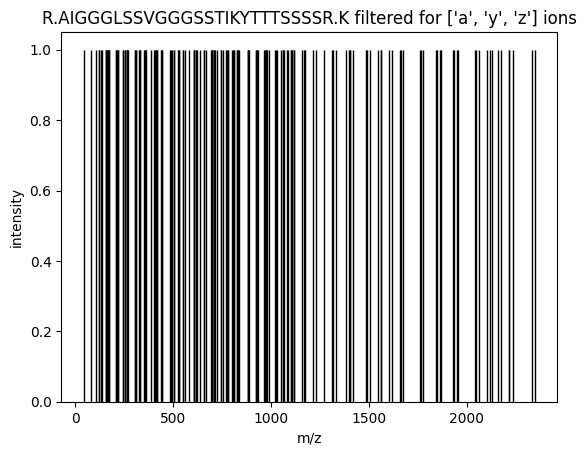

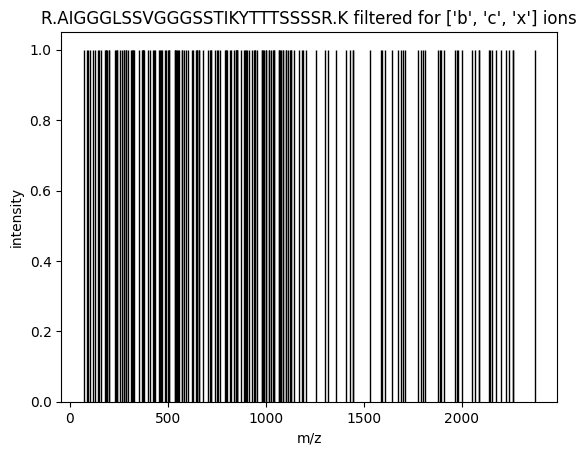

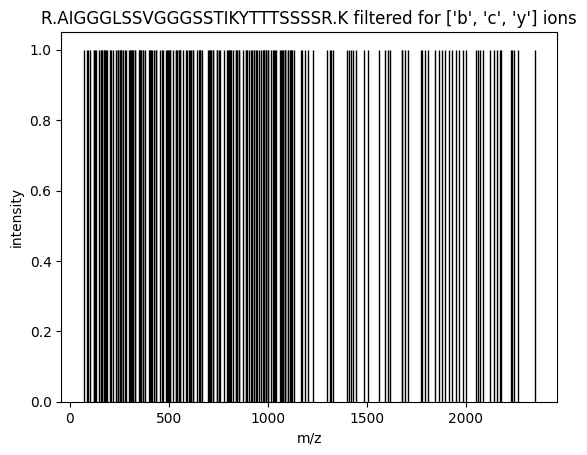

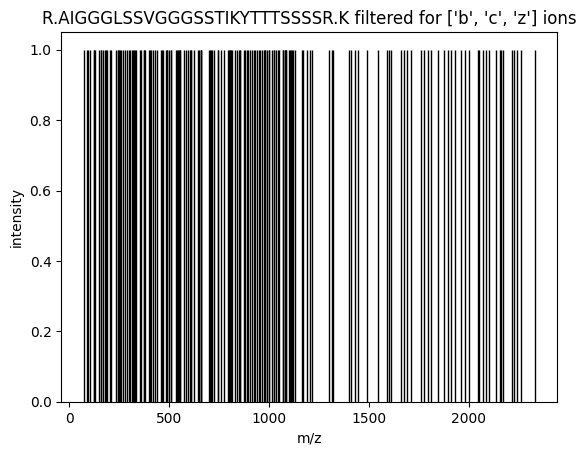

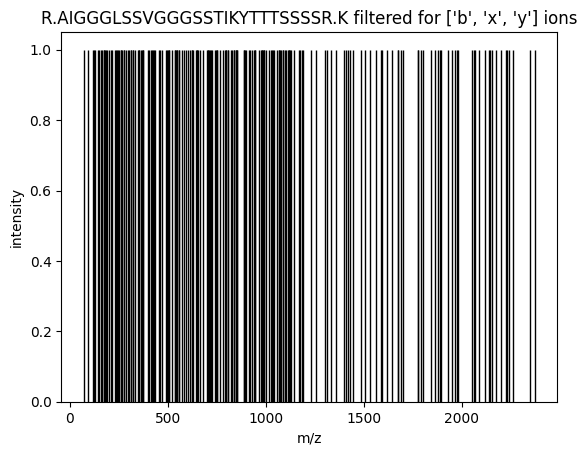

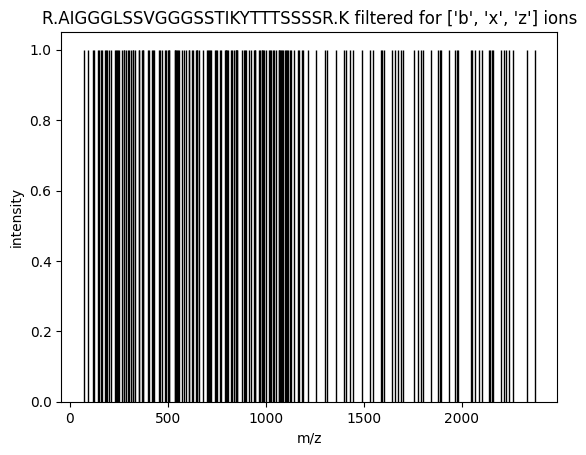

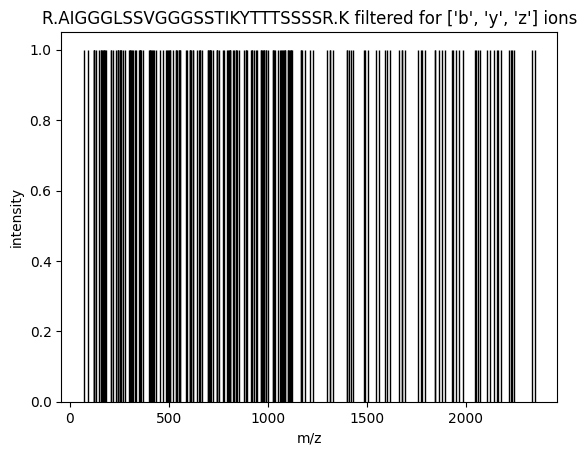

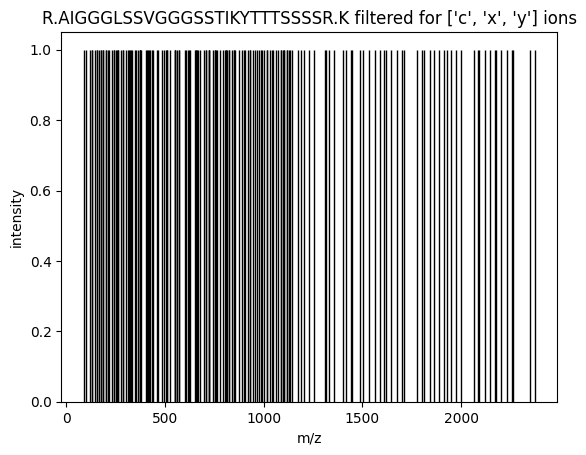

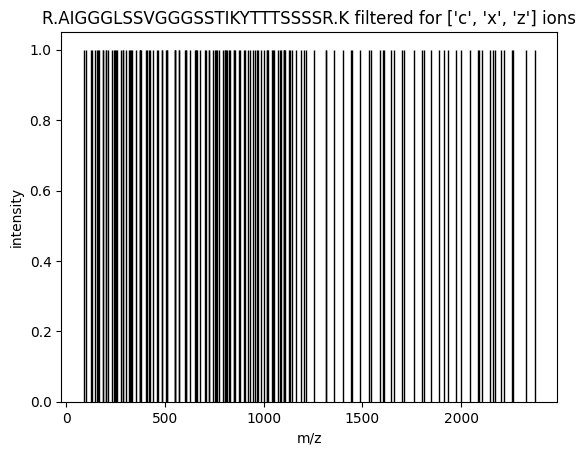

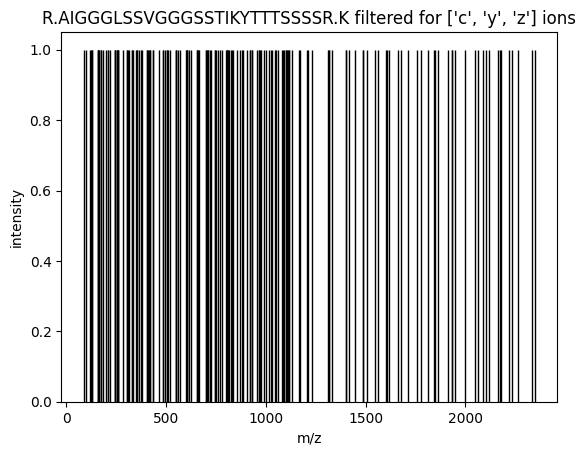

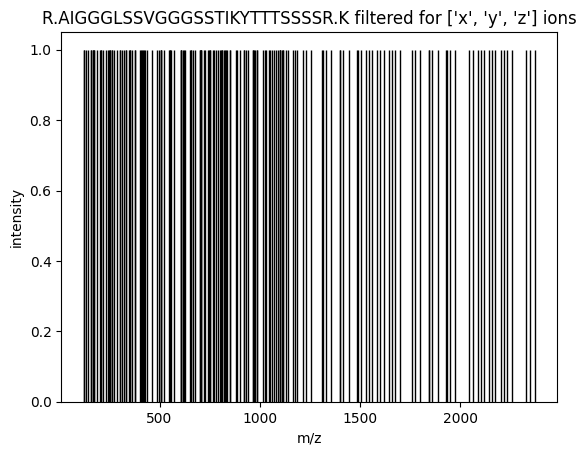

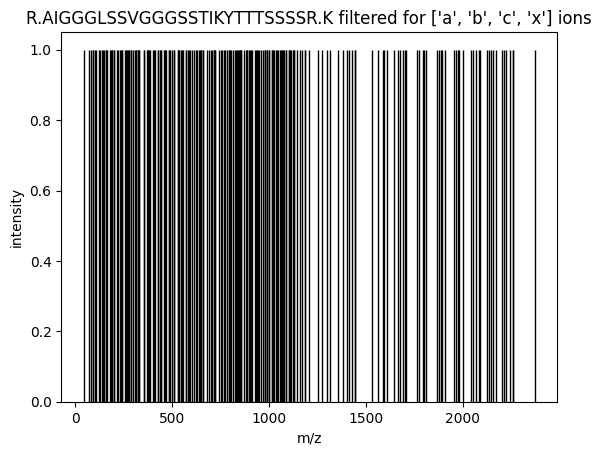

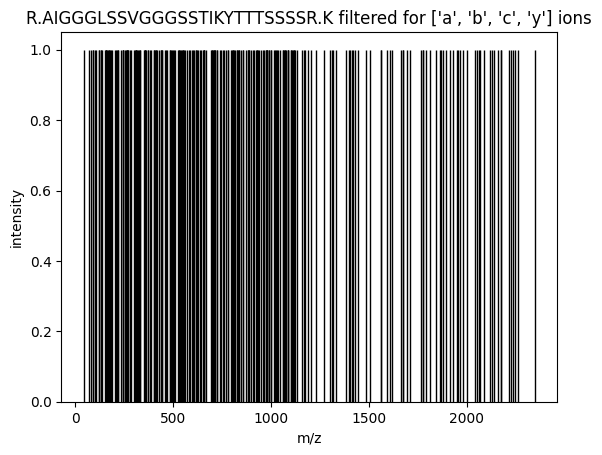

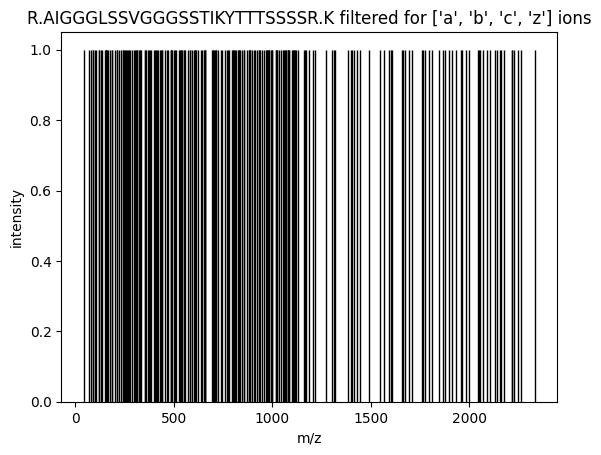

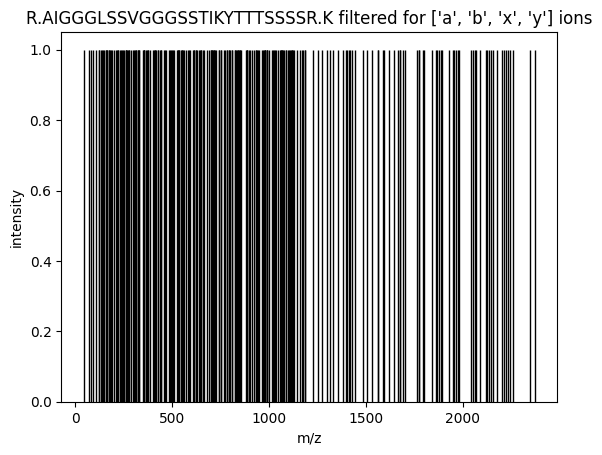

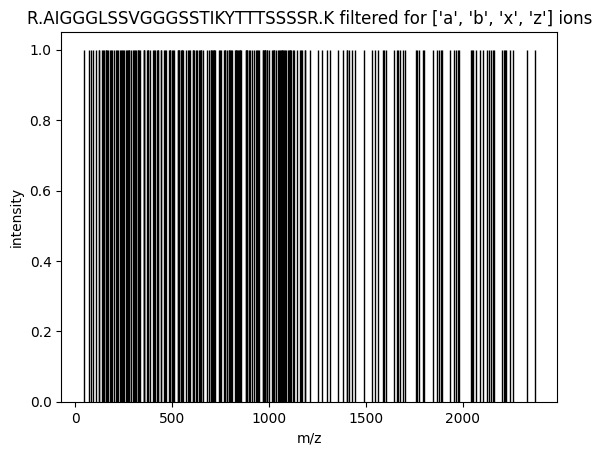

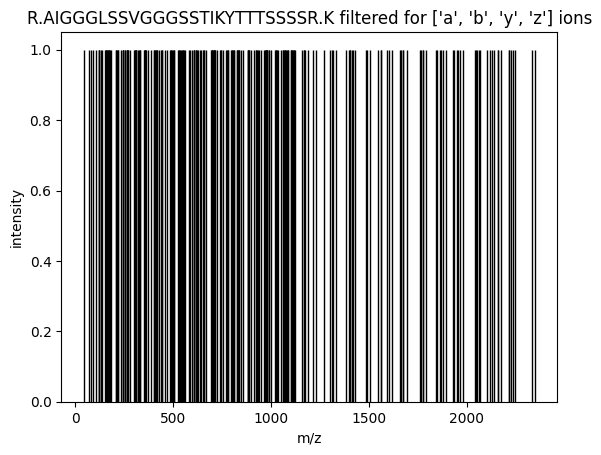

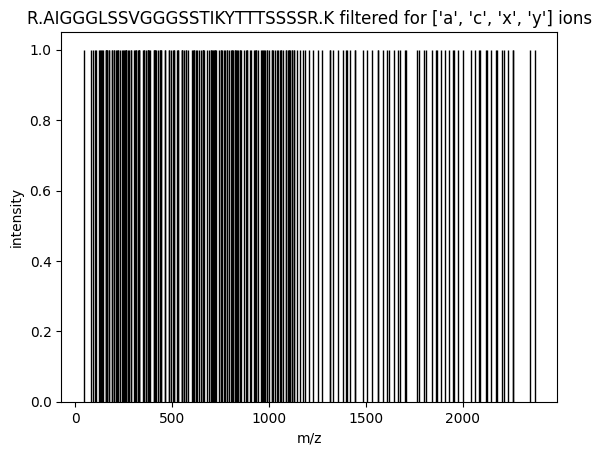

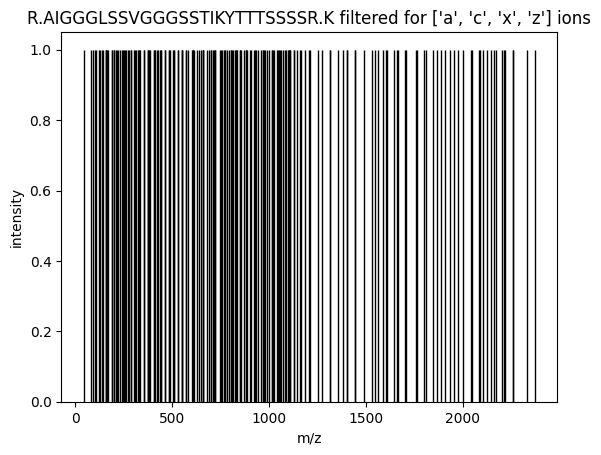

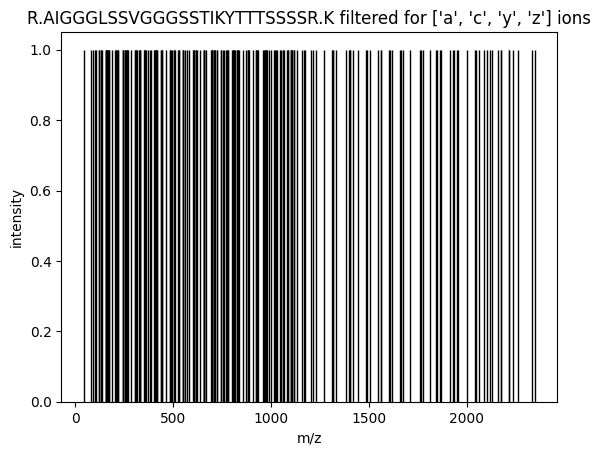

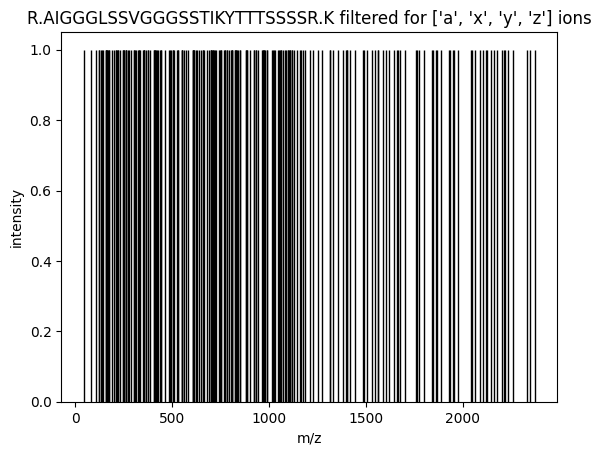

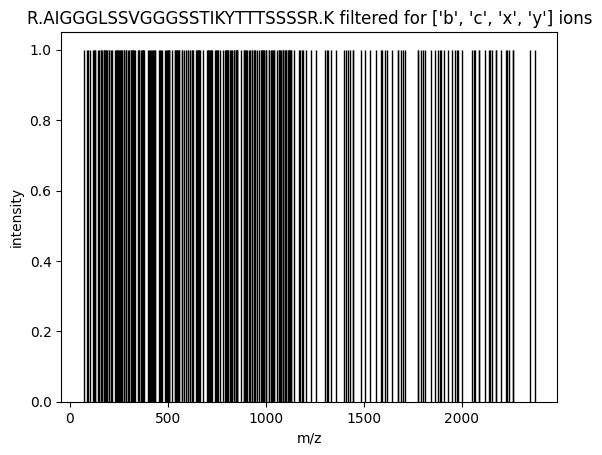

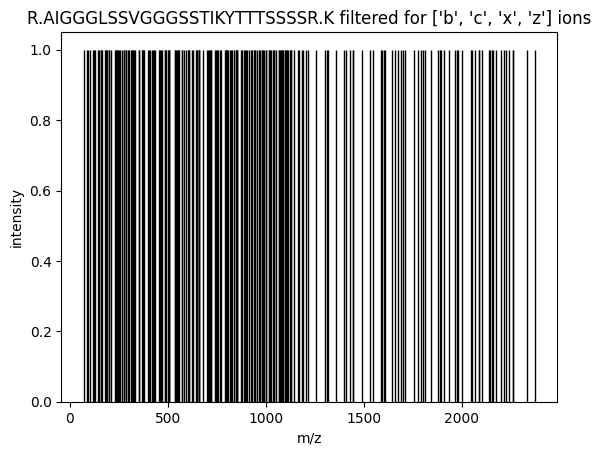

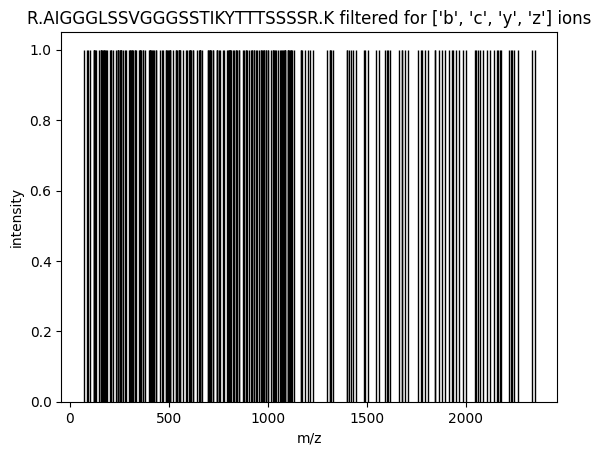

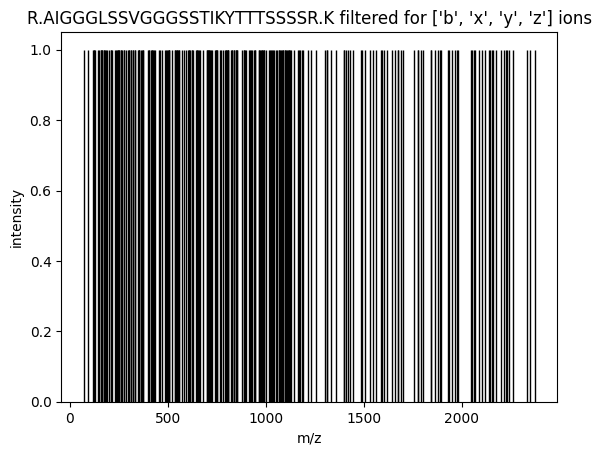

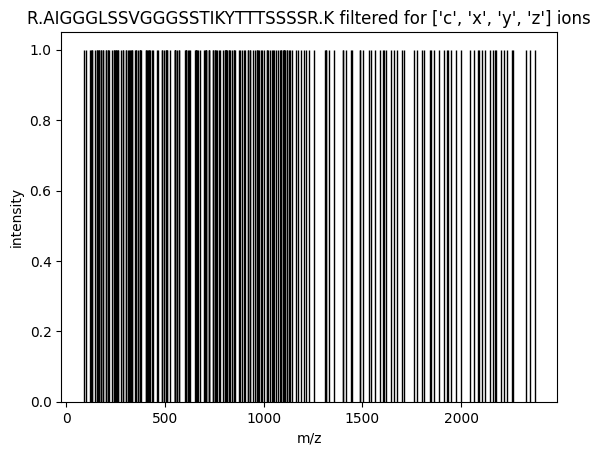

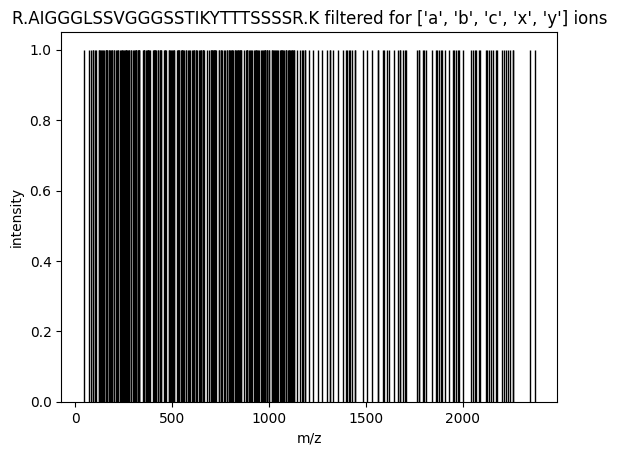

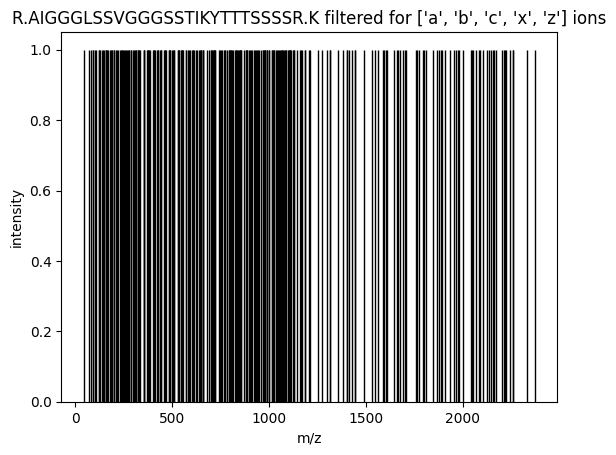

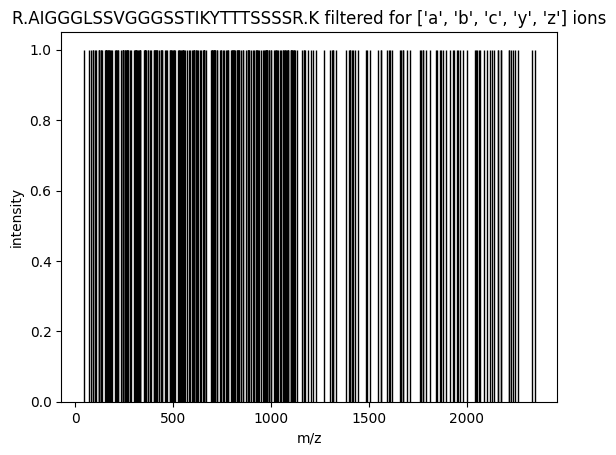

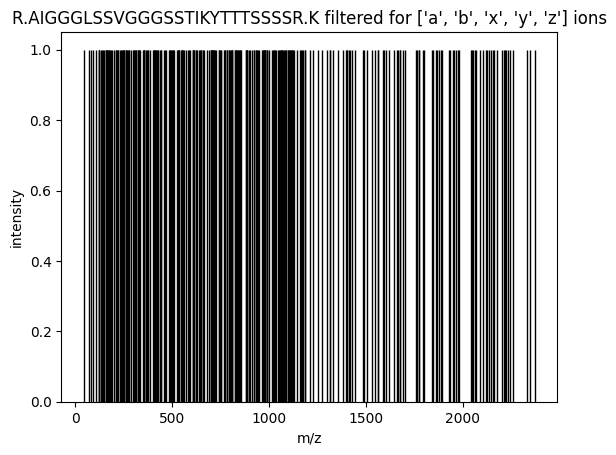

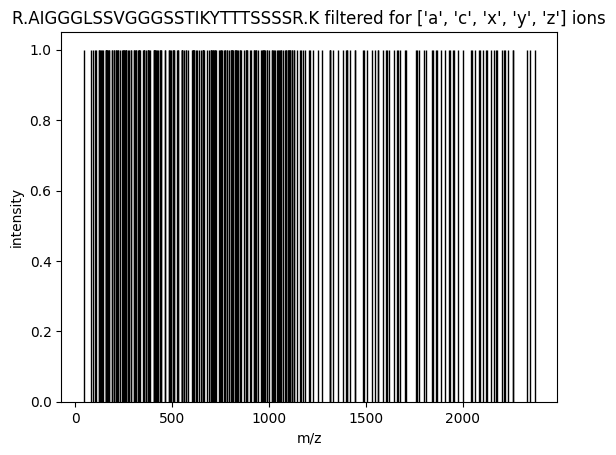

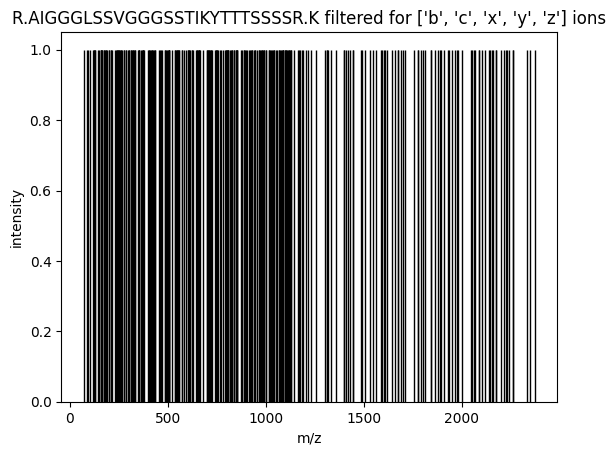

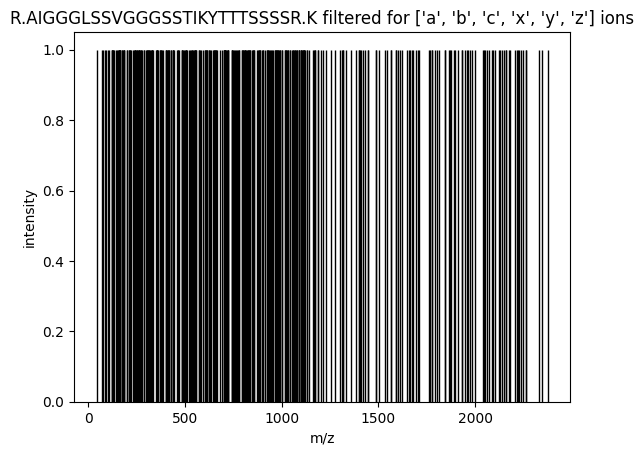

In [23]:
import itertools

# Make all possible combinations of ion_list
ion_list = ['a', 'b', 'c', 'x', 'y', 'z']
ion_list_combinations = []
for i in range(1, len(ion_list)+1):
    ion_list_combinations.append(list(itertools.combinations(ion_list, i)))
ion_list_combinations = [item for sublist in ion_list_combinations for item in sublist]
ion_list_combinations = [list(x) for x in ion_list_combinations]
print(ion_list_combinations)

for peptide in test_theospecs:
    for ion_list in ion_list_combinations:
        mz = test_theospecs[peptide]['mz_arr']
        intensity = test_theospecs[peptide]['intensity_arr']
        ion_info = test_theospecs[peptide]['ion_name_arr']

        mz_theo_filtered, intensity_theo_filtered = select_ion_data(mz, intensity, ion_info, ion_list )
        mz_theo_filtered = np.array([int(x) for x in mz_theo_filtered])
        intensity_theo_filtered = np.array([int(x) for x in intensity_theo_filtered])

        spectrum_theo_filtered = {
            'm/z array': mz_theo_filtered, 
            'intensity array': intensity_theo_filtered
        }
        pa.annotate_spectrum(
            spectrum_theo_filtered, 
            peptide[2:-2], 
            precursor_charge=2, 
            # backend='spectrum_utils',
            ion_types='', 
            title=f"{peptide} filtered for {ion_list} ions")
        plt.show()

        # Plot
        # plt.figure(figsize=(10, 5))
        # plt.plot(mz_theo_filtered, intensity_theo_filtered, label='Theoretical')
        # plt.title(f'{mzml_file} Peptide {peptide}')
        # plt.xlabel('m/z')
        # plt.ylabel('Intensity')
        # plt.legend()
        # plt.show()
    break

In [ ]:
# for (scan_num, orig_peptide, modified_peptide) in new_spectrums:
#     mz_actual = test_spectrums[mzml_file][scan_num]['mz_arr']
#     intensity_actual = test_spectrums[mzml_file][scan_num]['intensity_arr']

#     mz_actual = np.array([float(x) for x in mz_actual])
#     intensity_actual = np.array([float(x) for x in intensity_actual])

#     spectrum_actual = {
#         'm/z array': mz_actual, 
#         'intensity array': intensity_actual
#     }
    
#     mz_theo = test_theospecs[orig_peptide]['mz_arr']
#     intensity_theo = test_theospecs[orig_peptide]['intensity_arr']
#     ion_info_theo = test_theospecs[orig_peptide]['ion_name_arr']
#     # print(ion_info_theo)
#     # print(test_theospecs[orig_peptide].keys())
#     ion_list = ['b','y']
#     mz_theo_filtered, intensity_theo_filtered = select_ion_data(mz_theo, intensity_theo, ion_info_theo, ion_list )

#     mz_theo = np.array([int(x) for x in mz_theo])
#     intensity_theo = np.array([int(x) for x in intensity_theo])
#     mz_theo_filtered = np.array([int(x) for x in mz_theo_filtered])
#     intensity_theo_filtered = np.array([int(x) for x in intensity_theo_filtered])

#     spectrum_theo = {
#         'm/z array': mz_theo, 
#         'intensity array': intensity_theo
#     }
#     spectrum_theo_filtered = {
#         'm/z array': mz_theo_filtered, 
#         'intensity array': intensity_theo_filtered
#     }

#     # Calculate cosine similarity between the 2 spectra
#     # cosine_greedy = CosineGreedy(tolerance=0.2)
#     # score = cosine_greedy.pair(spectrum_actual, spectrum_theo) 

#     # spectrum = {'m/z array': np.array([1,2,3]), 'intensity array': np.array([1,2,3])}
#     # peptide = 'WNQLQAFWGTGK'
#     print(orig_peptide)
#     pa.annotate_spectrum(
#         spectrum_actual, 
#         orig_peptide[2:-2], 
#         precursor_charge=2, 
#         # backend='spectrum_utils',
#         ion_types='aby', 
#         title=f"Actual spectrum for scan {scan_num}")
#     plt.show()
#     pa.annotate_spectrum(
#         spectrum_theo, 
#         orig_peptide[2:-2], 
#         precursor_charge=2, 
#         # backend='spectrum_utils',
#         ion_types='aby', 
#         title=orig_peptide)
#     plt.show()
#     pa.annotate_spectrum(
#         spectrum_theo_filtered, 
#         orig_peptide[2:-2], 
#         precursor_charge=2, 
#         # backend='spectrum_utils',
#         ion_types='aby', 
#         title=f"{orig_peptide} filtered for {ion_list} ions")
#     plt.show()
#     print("-----------------------------------------------")
